# 🏡 House Price & Inflation Prediction in Turkey (2026) 📈
## **Objective**
House prices in Turkey have been rising rapidly, influenced by various economic factors, especially **inflation**. This project aims to:
- Analyze the relationship between **house prices** and **inflation** over the past years.
- Develop a **predictive model** for estimating house prices in 2026.
- Use **Machine Learning** (Random Forest) and **mathematical modeling** (Least Squares) to make predictions.

## **Dataset**
Since there is no publicly available dataset with recent Turkish house prices and inflation trends, we use **simulated** data based on realistic market trends from **2015-2025**.

## **Approach**
✔ **Exploratory Data Analysis (EDA)** – Visualizing trends in house prices & inflation.  
✔ **Feature Engineering** – Creating new features like **price growth rate**.  
✔ **Modeling** – Using **RandomForestRegressor** to predict **2026 house prices**.  
✔ **Least Squares Regression** – Predicting **2026 inflation rate**.  
✔ **Evaluation** – Assessing model accuracy with **R² Score & MAE**.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from numpy.linalg import lstsq

# 🔹 Create Dataset
data = {
    'Year': np.arange(2015, 2026),
    'Avg_House_Price': [168000, 350000, 400000, 500000, 700000, 1000000, 1500000, 2000000, 2987000, 3400000, 3500000],
    'Inflation_Rate': [8.81, 8.53, 11.92, 20.30, 11.84, 14.60, 36.08, 64.27, 64.77, 44.38, 29.00]
}

df = pd.DataFrame(data)

# 🔹 Quick Overview
print(df.info())   # Check for missing values & data types
print(df.describe())  # Summary statistics
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             11 non-null     int32  
 1   Avg_House_Price  11 non-null     int64  
 2   Inflation_Rate   11 non-null     float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 352.0 bytes
None
              Year  Avg_House_Price  Inflation_Rate
count    11.000000     1.100000e+01       11.000000
mean   2020.000000     1.500455e+06       28.590909
std       3.316625     1.275456e+06       21.223088
min    2015.000000     1.680000e+05        8.530000
25%    2017.500000     4.500000e+05       11.880000
50%    2020.000000     1.000000e+06       20.300000
75%    2022.500000     2.493500e+06       40.230000
max    2025.000000     3.500000e+06       64.770000


,Year,Avg_House_Price,Inflation_Rate
0,2015,168000,8.81
1,2016,350000,8.53
2,2017,400000,11.92
3,2018,500000,20.30
4,2019,700000,11.84


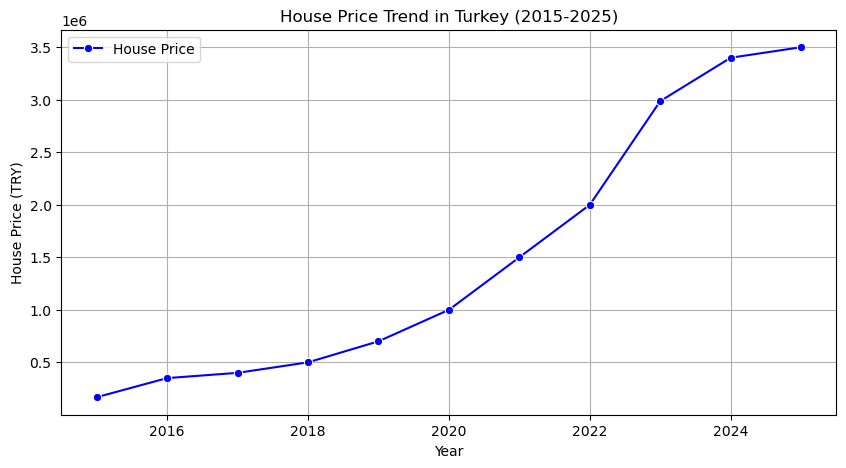

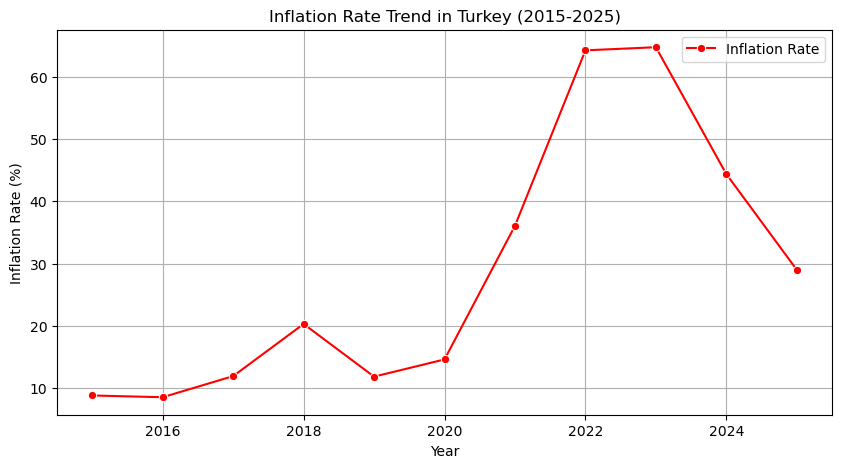

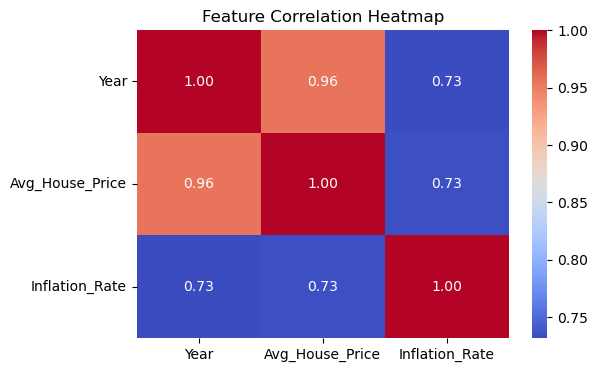

In [4]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Year'], y=df['Avg_House_Price'], marker='o', color='blue', label='House Price')
plt.xlabel('Year')
plt.ylabel('House Price (TRY)')
plt.title('House Price Trend in Turkey (2015-2025)')
plt.legend()
plt.grid(True)
plt.show()

# 🔹 Visualization: Inflation Rate Over Time
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Year'], y=df['Inflation_Rate'], marker='o', color='red', label='Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rate Trend in Turkey (2015-2025)')
plt.legend()
plt.grid(True)
plt.show()

# 🔹 Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# 🔹 Add Price Growth Rate
df['Price_Growth'] = df['Avg_House_Price'].pct_change().fillna(0)

# 🔹 Define Features & Target
X = df[['Year', 'Inflation_Rate']]
y = df['Avg_House_Price']

In [8]:
# 🔹 Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Train RandomForest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 🔹 Cross Validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

# 🔹 Predict House Price for 2026
future_data = pd.DataFrame({'Year': [2026], 'Inflation_Rate': [70.0]})
future_scaled = scaler.transform(future_data)
price_2026 = model.predict(future_scaled)

# 🔹 Model Evaluation
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Predicted House Price in 2026: {price_2026[0]:,.2f} TRY')
print(f'Model Performance: MAE={mae:.2f}, R²={r2:.2f}')
print(f'Cross-Validation R² Score: {cv_scores.mean():.2f}')

Predicted House Price in 2026: 3,074,280.00 TRY
Model Performance: MAE=254930.00, R²=0.95
Cross-Validation R² Score: nan


C:\Users\myase\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\myase\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


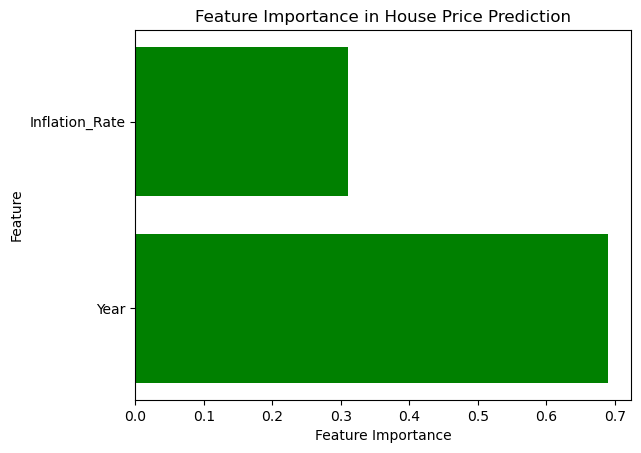

In [10]:
importances = model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances, color='green')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in House Price Prediction")
plt.show()

In [16]:
# 🔹 Least Squares Method
X_years = np.vstack([df['Year'], np.ones(len(df['Year']))]).T
y_inflation = df['Inflation_Rate']
coeffs, residuals, rank, s = lstsq(X_years, y_inflation)

# 🔹 Predict Inflation for 2026
year_2026 = np.array([2026, 1])
predicted_inflation_2026 = year_2026 @ coeffs

print(f'Predicted Inflation Rate in 2026: {predicted_inflation_2026:.2f}%')

Predicted Inflation Rate in 2026: 56.69%


C:\Users\myase\AppData\Local\Temp\ipykernel_89520\2385355072.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeffs, residuals, rank, s = lstsq(X_years, y_inflation)


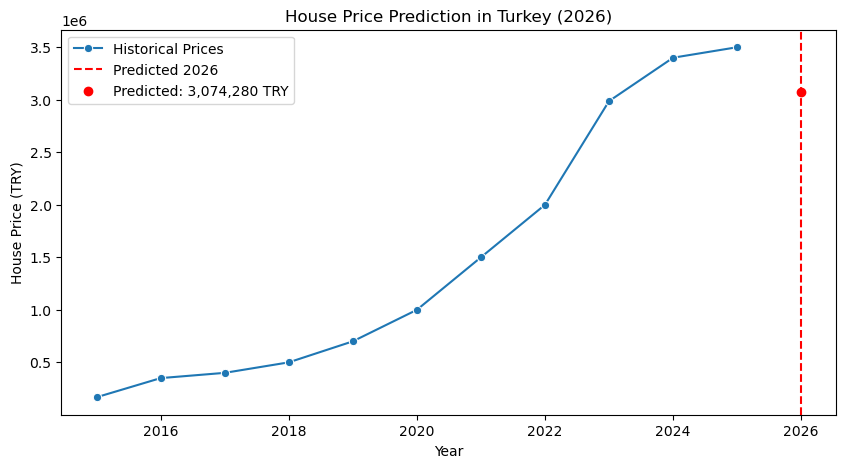

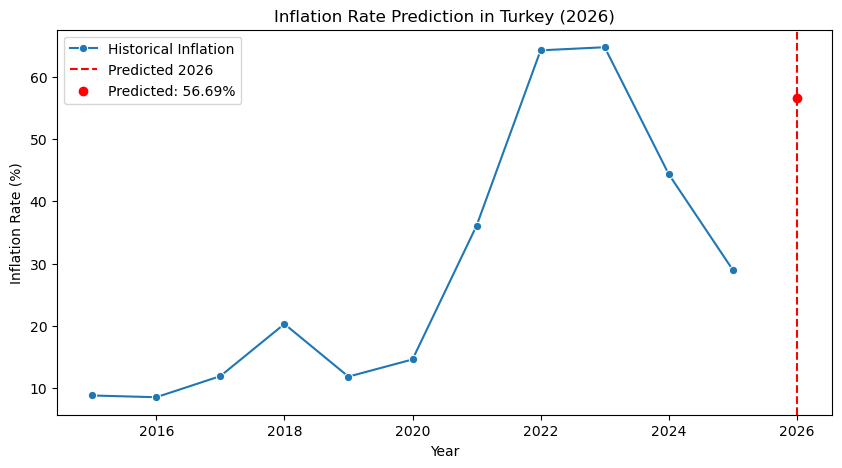

In [18]:
# 🔹 House Price Prediction Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Year'], y=df['Avg_House_Price'], marker='o', label='Historical Prices')
plt.axvline(x=2026, color='r', linestyle='--', label='Predicted 2026')
plt.scatter(2026, price_2026, color='red', label=f'Predicted: {price_2026[0]:,.0f} TRY')
plt.xlabel('Year')
plt.ylabel('House Price (TRY)')
plt.title('House Price Prediction in Turkey (2026)')
plt.legend()
plt.show()

# 🔹 Inflation Rate Prediction Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Year'], y=df['Inflation_Rate'], marker='o', label='Historical Inflation')
plt.axvline(x=2026, color='r', linestyle='--', label='Predicted 2026')
plt.scatter(2026, predicted_inflation_2026, color='red', label=f'Predicted: {predicted_inflation_2026:.2f}%')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rate Prediction in Turkey (2026)')
plt.legend()
plt.show()